##  Support Vector Machine (SVM)

###  Historia y Origen

El **Support Vector Machine (SVM)** fue inventado en **1963** por  
**Vladimir N. Vapnik** y **Alexey Ya. Chervonenkis** mientras trabajaban en **AT&T Bell Labs**.  
Posteriormente, Vladimir Vapnik se unió a **Facebook AI Research** en noviembre de **2014**.

En **1992**, **Bernhard E. Boser**, **Isabelle M. Guyon** y **Vladimir N. Vapnik** propusieron un método para crear **clasificadores no lineales** aplicando el denominado **kernel trick** a los **hiperplanos de margen máximo (maximum-margin hyperplanes)**.

La versión moderna, conocida como **soft margin SVM**, fue propuesta por  
**Corinna Cortes** y **Vladimir Vapnik** en **1993** y publicada en **1995**.

---



## 1️⃣ Introducción

Métodos de aprendizaje supervisado utilizados para clasificación, regresión y detección de valores atípicos.

Supongamos que tenemos dos clases aquí: negra y morada.  
En la clasificación, estamos interesados en la mejor manera de separar las dos clases.

<img src='img//SVM_1.png' width=50%>

Podemos separarlas con una línea como en el siguiente ejemplo.  
Puedes considerar esto como un ejemplo de cómo la regresión logística separaría las dos clases.

<img src='img//SVM_2.png' width=50%>

Sin embargo, hay infinitas líneas (en un espacio bidimensional) o hiperplanos (en un espacio tridimensional) que pueden usarse para separar las dos clases, como se ilustra en el siguiente ejemplo.

El término *hiperplano* esencialmente significa que es un subespacio de una dimensión menos que su espacio ambiente.  
Si un espacio es tridimensional, entonces sus hiperplanos son planos bidimensionales, mientras que si el espacio es bidimensional, sus hiperplanos son líneas unidimensionales.

<img src='img//SVM_3.png' width=50%>

En SVM, la **línea separadora**, la línea marrón sólida, es la línea que permite el mayor margen entre las dos clases.

El SVM colocará la línea separadora en el centro del margen, también llamado **margen máximo**.  
El SVM optimizará y ubicará el hiperplano que maximiza el margen entre las dos clases.

Las muestras que están más cerca del hiperplano se denominan **vectores de soporte**, y están marcadas con un círculo rojo.

<img src='img//SVM_4.png' width=50%>


---
## 2️⃣ Clasificación SVM Lineal

### Vectores de Soporte

Separar con una línea recta (linealmente separable).

### Margen

**Clasificación de margen rígido (Hard Margin)**

Basada estrictamente en aquellos puntos que se encuentran en el margen entre las dos clases.  
Sin embargo, esto es sensible a los valores atípicos (*outliers*).

**Clasificación de margen suave (Soft Margin)**

Amplía el margen y permite violaciones.  
Con Python Scikit-Learn, puedes controlar el ancho del margen.  
Se controla con el hiperparámetro **C**:  
- Un **C** más pequeño conduce a una calle más ancha, pero con más violaciones del margen.  
- Un **C** más grande genera menos violaciones del margen, pero termina con un margen más pequeño.

**Nota:**  
Los SVM son sensibles a la escala de las características (*feature scaling*).


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [4]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

### 📘 Documentación de cada uno:

**LinearSVC**

Similar a `SVC` con el parámetro `kernel='linear'`, pero implementado en términos de **liblinear** en lugar de **libsvm**, por lo que ofrece más flexibilidad en la elección de penalizaciones y funciones de pérdida, y debería escalar mejor a un gran número de muestras.

**SVC**

Clasificación de Vectores de Soporte tipo **C-Support Vector Classification**.  

La implementación se basa en **libsvm**.  
La complejidad del tiempo de ajuste (*fit time complexity*) es más que cuadrática con respecto al número de muestras, lo que hace difícil escalar a conjuntos de datos con más de unas pocas decenas de miles de muestras.


In [6]:
C = 0.001
clf = svm.SVC(kernel='linear', C=C)
#clf = svm.LinearSVC(C=C, loss='hinge')
#clf = svm.SVC(kernel='poly', degree=3, C=C)
#clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X, y)

SVC(C=0.001, kernel='linear')

In [7]:
clf.predict([[6, 2]])

c:\Users\PcVIP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

c:\Users\PcVIP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


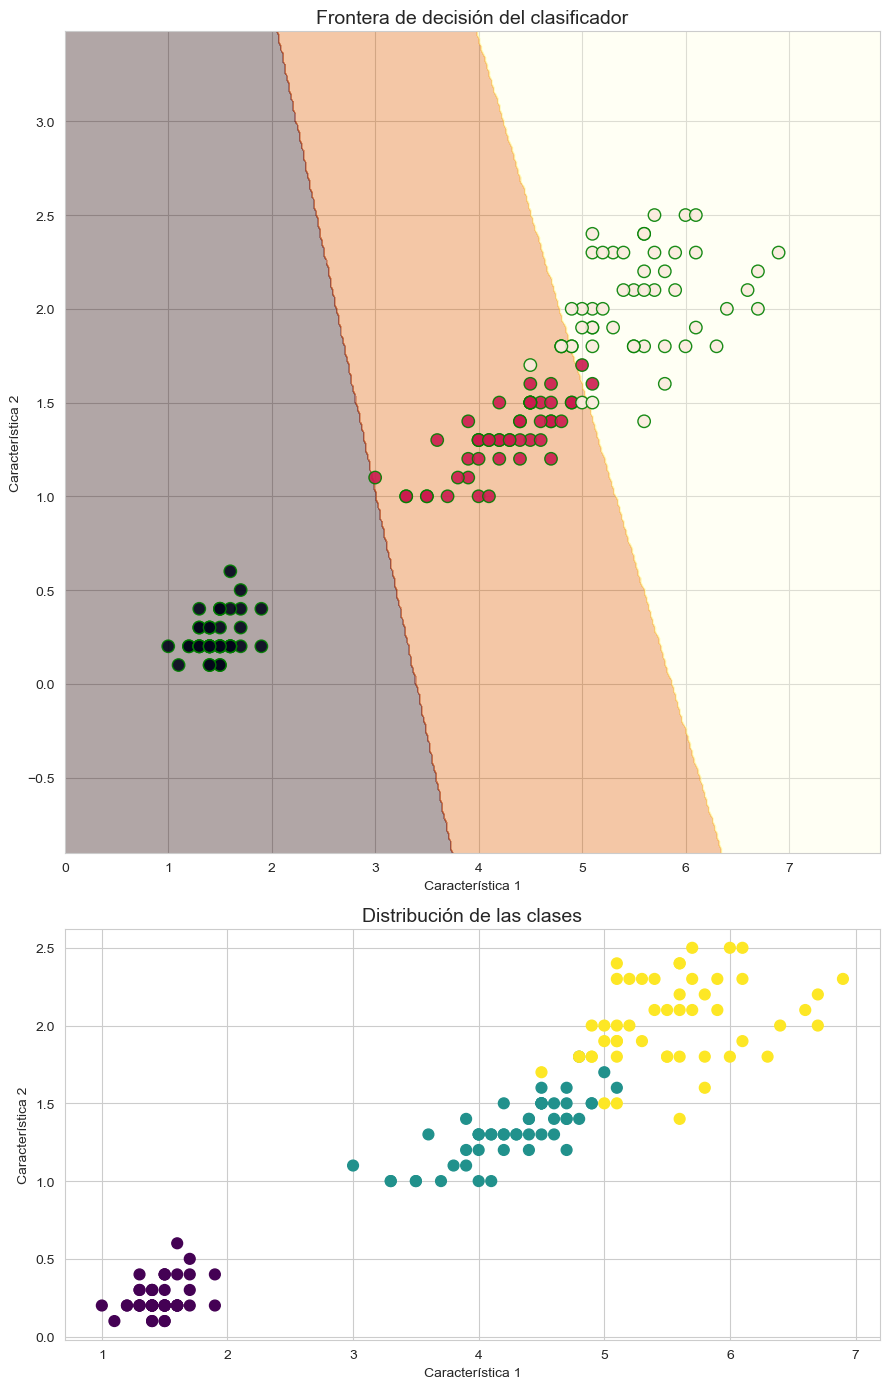

In [13]:
# ============================================================
# VISUALIZACIÓN DE FRONTERA DE DECISIÓN PARA UN CLASIFICADOR (SVM / RF / ETC.)
# ============================================================

# ------------------------------------------------------------
# 1️⃣ Convertimos X en una matriz numpy
#    Asegúrate de que X tenga exactamente 2 columnas (para poder graficar en 2D)
# ------------------------------------------------------------
X_plot = X.values
assert X_plot.shape[1] == 2, "X debe tener exactamente 2 columnas para este gráfico."

# ------------------------------------------------------------
# 2️⃣ Si tu modelo se entrenó con datos escalados (StandardScaler, etc.),
#    deberías transformar X_plot con ese mismo escalador.
#    Si no, dejamos los valores originales:
# ------------------------------------------------------------
X_plot_used = X_plot  # o: X_plot_used = scaler.transform(X_plot)

# ------------------------------------------------------------
# 3️⃣ Creamos una malla (grid) de puntos sobre el espacio de entrada
#    Esto sirve para pintar las regiones de decisión
# ------------------------------------------------------------
h = 0.02  # tamaño del paso en el grid — más pequeño = mayor resolución
x_min, x_max = X_plot_used[:, 0].min() - 1, X_plot_used[:, 0].max() + 1
y_min, y_max = X_plot_used[:, 1].min() - 1, X_plot_used[:, 1].max() + 1

# np.meshgrid crea dos matrices 2D con todas las combinaciones de valores X e Y
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# ------------------------------------------------------------
# 4️⃣ Clasificamos todos los puntos del grid con el modelo entrenado (clf)
# ------------------------------------------------------------
grid_points = np.c_[xx.ravel(), yy.ravel()]  # combina cada punto (x, y)
z = clf.predict(grid_points)                 # predice la clase para cada punto
z = z.reshape(xx.shape)                      # reorganiza los resultados en forma 2D

# ------------------------------------------------------------
# 5️⃣ Creamos una figura con dos subgráficos (uno arriba, otro abajo)
# ------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 14),
                               gridspec_kw={'height_ratios': [2, 1]})

# ------------------------------------------------------------
# 6️⃣ Primer gráfico: frontera de decisión + puntos de datos
# ------------------------------------------------------------
# Mapa de colores de las regiones de decisión
cont = ax1.contourf(xx, yy, z, cmap='afmhot', alpha=0.35)

# Puntos reales del dataset
ax1.scatter(X_plot_used[:, 0], X_plot_used[:, 1], c=y, s=80,
            alpha=0.9, edgecolors='g')

ax1.set_title("Frontera de decisión del clasificador", fontsize=14)
ax1.set_xlabel("Característica 1")
ax1.set_ylabel("Característica 2")

# ------------------------------------------------------------
# 7️⃣ Segundo gráfico: distribución de clases (sin frontera)
# ------------------------------------------------------------
ax2.scatter(X_plot_used[:, 0], X_plot_used[:, 1], c=y, s=60, cmap='viridis')
ax2.set_title("Distribución de las clases", fontsize=14)
ax2.set_xlabel("Característica 1")
ax2.set_ylabel("Característica 2")

# ------------------------------------------------------------
# 8️⃣ Mostrar todo
# ------------------------------------------------------------
plt.tight_layout()
plt.show()


## Implementacion SVM linear

In [14]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    random_state=0)

### Scale features

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

C = 1.0 #0.01
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_std_train, y_train)

SVC(kernel='linear')

### Cross Validation dentro del dataset entrenado

In [16]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9500
Accuracy SD: 		 0.0553


In [17]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

In [18]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9500
Recall Score: 		 0.9500
F1 Score: 		 0.9500


### Cross Validation dentro del dataset test

In [19]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [20]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.9422
Recall Score: 		 0.9333
F1 Score: 		 0.9290


## 3️⃣ Clasificación SVM con Núcleo Polinómico



<img src='img//svm_polynomial.png' width=40%, height=40%>